In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
#for dirname, _, filenames in os.walk('/home/cdsw'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Data Cleaning & Transformation

In [2]:
data = pd.read_csv('/home/cdsw/Loan_Default.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [3]:
# Unique values of each categorical feature:

for col in data.columns:
    if data[col].dtypes == object:
        print(col + ' ' + '-'*(30-len(col)) + ' ', data[col].unique())
    else:
        pass

loan_limit --------------------  ['cf' nan 'ncf']
Gender ------------------------  ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv -----------------  ['nopre' 'pre' nan]
loan_type ---------------------  ['type1' 'type2' 'type3']
loan_purpose ------------------  ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness -------------  ['l1' 'l2']
open_credit -------------------  ['nopc' 'opc']
business_or_commercial --------  ['nob/c' 'b/c']
Neg_ammortization -------------  ['not_neg' 'neg_amm' nan]
interest_only -----------------  ['not_int' 'int_only']
lump_sum_payment --------------  ['not_lpsm' 'lpsm']
construction_type -------------  ['sb' 'mh']
occupancy_type ----------------  ['pr' 'sr' 'ir']
Secured_by --------------------  ['home' 'land']
total_units -------------------  ['1U' '2U' '3U' '4U']
credit_type -------------------  ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type ------  ['CIB' 'EXP']
age ---------------------------  ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<2

**Understanding some abbreviations and their meaning:**
* Loan limit: CF (conforming) or NCF (non-conforming). Conforming loans meet the criteria for purchases by Fannie Mae or Freddie Mac to issue MBS, thus usually have lower interest or downpayment. ([source](https://www.quickenloans.com/learn/what-is-a-conforming-loan))
* Approveal in advance (approv_in_adv): as the name suggests.
* Open credit: whether the borrower is allowed to borrow more money.
* Neg ammortization: A negative amortization loan is one in which unpaid interest is added to the balance of unpaid principal. ([source](https://www.investopedia.com/terms/n/negativeamortization.asp)) 
* Construction type: SB (splash block) or MH (manhole)
* Occupancy type: PR, SR, and IR refer to primary, secondary and investment. Financial risks increase with the latter ones, so do interest rates. ([soure](https://www.homelendingpal.com/how-mortgage-lenders-determine-interest-rates-based-on-occupancy-types/))
* Credit type: EXP = Experian, EQUI = Equifax, CRIF = CRIF Highmark, CIB = CIBIL. These are different credit reporting agencies. The main differences come down to the credit score calculations used and how they process information. ([source](https://www.chase.com/personal/credit-cards/education/credit-score/credit-bureau-differences) and [source](https://en.wikipedia.org/wiki/Credit_bureau))
* Submission of application: *to_inst* seems to refer to a special method for loan approval, i.e. instance-based method. Read more at ([source](https://www.sciencedirect.com/science/article/pii/S0957417421002396)).
* Security type: Direct or Indirect. Direct security means the borrower uses the mortgaged house to pledge against the loan. ([source](https://corporatefinanceinstitute.com/resources/commercial-lending/direct-security/#:~:text=To%20conclude%2C%20direct%20securities%20are,the%20borrower%20default%20on%20it.))


In [4]:
# Remove features that are deemed to have insignificant impact on default

loan = data.copy()
loan.drop(columns=[
    'ID' ,'loan_limit' ,'Gender', 'construction_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'Region', 'Neg_ammortization', 'year', 'submission_of_application' , 'approv_in_adv'
], axis=1, inplace=True)

In [5]:
loan.describe()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


Almost 25% of the loans are defaults (mean value of Status). The dataset is imbalance but not significantly. Noticably there are some loans where income = 0 and most of them defaulted as shown below.

In [6]:
zero_income = loan[loan['income']==0]
zero_income.groupby(['Status'])['Status'].count()

Status
0       8
1    1252
Name: Status, dtype: int64

In [7]:
# Checking for duplicates

print('Number of duplicated records: ', len(loan[loan.duplicated() == True]))

Number of duplicated records:  1


In [8]:
# Remove duplicates and double check

loan.drop_duplicates()
print('Number of duplicated records: ', len(loan[loan.duplicated() == True]))

Number of duplicated records:  1


In [9]:
# Checking for missing data

print('Pecentage of missing data:       %')
print('----------------------------------')
round(loan.isna().sum()/loan.count() * 100,2).sort_values()

Pecentage of missing data:       %
----------------------------------


loan_type                  0.00
Credit_Worthiness          0.00
open_credit                0.00
business_or_commercial     0.00
loan_amount                0.00
Credit_Score               0.00
interest_only              0.00
lump_sum_payment           0.00
occupancy_type             0.00
Status                     0.00
Security_Type              0.00
term                       0.03
loan_purpose               0.09
age                        0.13
income                     6.56
property_value            11.30
LTV                       11.30
dtir1                     19.37
rate_of_interest          32.47
Interest_rate_spread      32.70
Upfront_charges           36.36
dtype: float64

Handling missing values in each feature should be dealt with separately because they have different characteristics. It should also be done in a specific order to account for their relationship. 

* Term, loan_purpose, age: fill with the most popular value since missing values are insignificant.
* income, property_value, rate_of_interest, Interest_rate_spread, Upfront_charges: fill with mean value. (AFD)
* LTV, dtir1: fill with the result of calculations from loan amount, property value, and income. Since there are records with income=0, we will replace 0 with the mean value of income before performing divisions. (AFD)

For future development, read more about different methods [here](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/#:~:text=Impute%20with%20Averages%20or%20Midpoints,method%20can%20preserve%20data%20integrity.) and [here](https://medium.com/@pingsubhak/handling-missing-values-in-dataset-7-methods-that-you-need-to-know-5067d4e32b62#).

(AFD: Area for development)

In [10]:
# Fill with most popular value
g1 = ['term', 'loan_purpose', 'age', ]
for col in g1:
    loan[col] = loan[col].fillna(loan[col].value_counts().keys()[0])

# Fill with mean
g2 = ['income', 'property_value', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges']
for col in g2:
    loan[col] = loan[col].fillna(loan[col].mean())
    
# Replace 0 with mean
loan['income'] = loan['income'].replace(0, loan['income'].mean())
    
# Fill with calculated values
loan['LTV'] = loan['LTV'].fillna(loan['loan_amount'] / loan['property_value'])
loan['dtir1'] = loan['dtir1'].fillna(loan['loan_amount'] / loan['income']) 

In [11]:
# Change the data type of Status to categorical

loan = loan.astype({'Status': 'object'})

In [12]:
loan.describe()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
count,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000
mean,3.311177e+05,4.045476,0.441656,3224.996127,335.143438,4.978935e+05,7016.303341,699.789103,65.426067,40.500625
std,1.839093e+05,0.487764,0.445359,2784.133285,58.402488,3.411696e+05,6260.537217,115.875857,43.695528,18.232419
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,60.000000,500.000000,0.033140,1.961806
25%,1.965000e+05,3.750000,0.181500,1250.000000,360.000000,2.880000e+05,3900.000000,599.000000,54.584352,32.000000
50%,2.965000e+05,4.045476,0.441656,3224.996127,360.000000,4.580000e+05,6120.000000,699.000000,73.026316,40.000000
75%,4.365000e+05,4.250000,0.620000,3889.495000,360.000000,5.980000e+05,8280.000000,800.000000,84.722222,47.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,2455.000000


## Univariate Analysis

In [13]:
# Grouping features for visualization
input_1 = ['loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'term', 'interest_only', 'lump_sum_payment', 'occupancy_type', 'Credit_Score', 'age', 'Security_Type']
input_2 = ['loan_amount', 'Upfront_charges', 'property_value', 'income', ]
input_3 = ['rate_of_interest', 'Interest_rate_spread', 'LTV', 'dtir1']

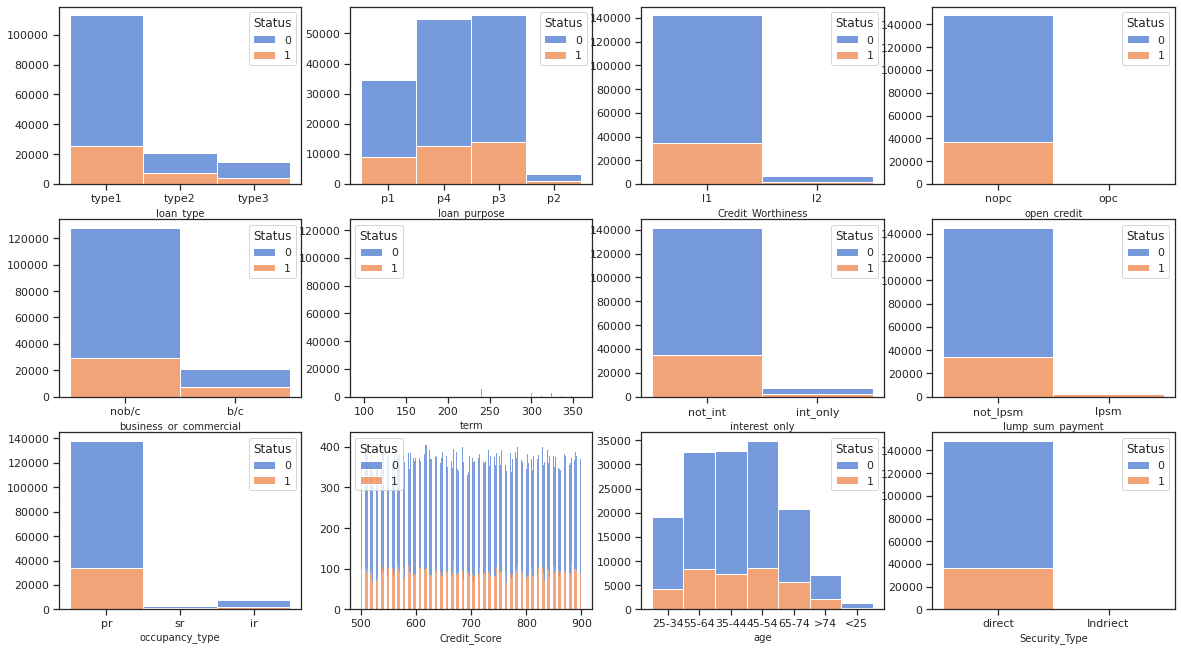

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

sns.set_theme(style="ticks", palette="muted")
f1 = plt.figure(figsize=(20,15))
for col in input_1:
    i = input_1.index(col) + 1
    ax = f1.add_subplot(4,4,i)
    g1 = sns.histplot(loan, x=loan[col], legend=True, hue='Status', binwidth=.5, multiple='stack')
    g1.set(ylabel=None)

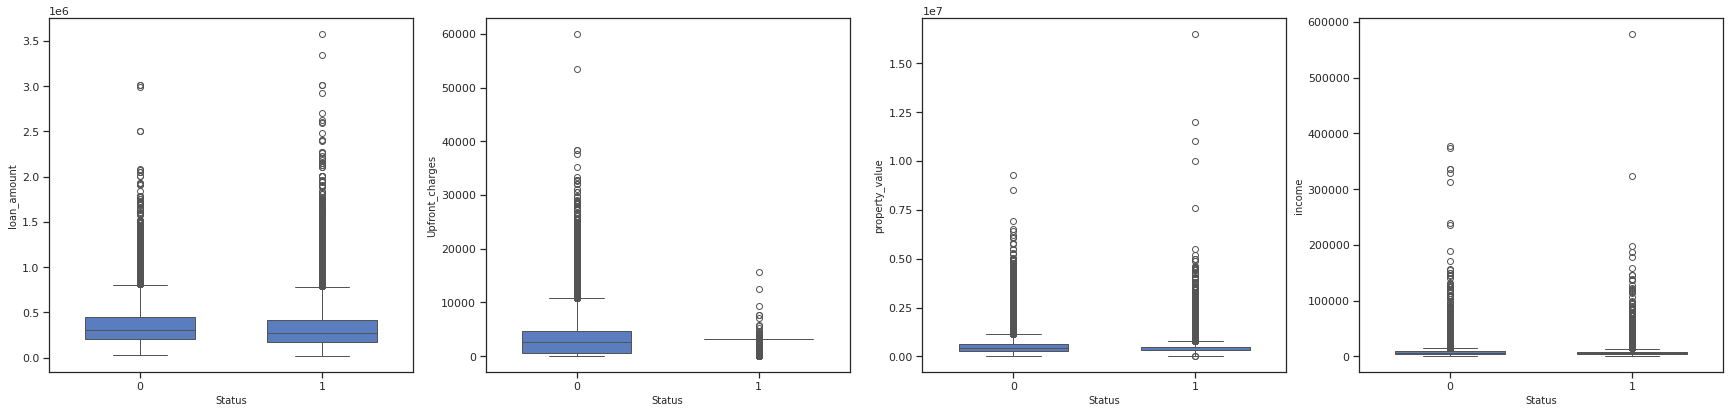

In [15]:

f2 = plt.figure(figsize=(30,30))
for col in input_2:
    i = input_2.index(col) + 1
    ax = f2.add_subplot(4,4,i)
    g2 = sns.boxplot(loan, y=col, x='Status', width=.6)

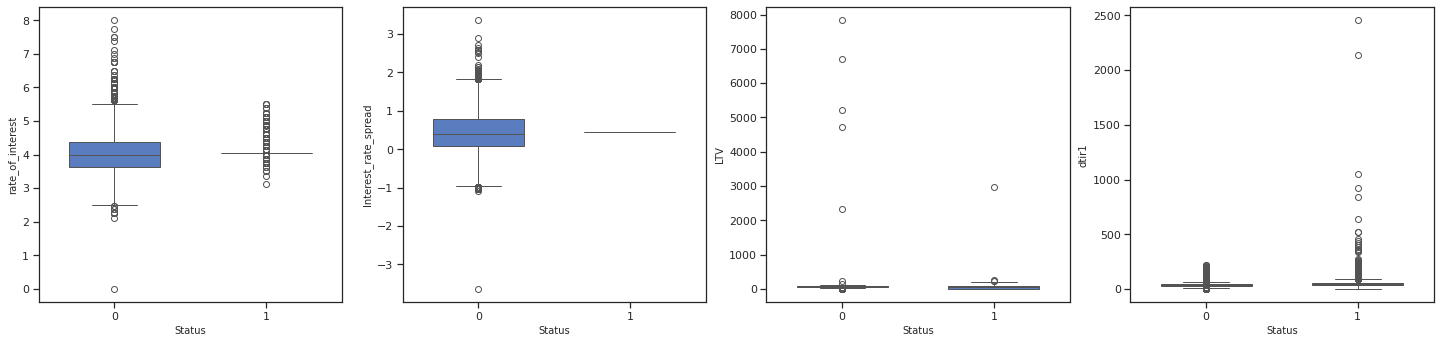

In [16]:
f3 = plt.figure(figsize=(25,25))
for col in input_3:
    i = input_3.index(col) + 1
    ax = f3.add_subplot(4,4,i)
    g3 = sns.boxplot(loan, y=col, x='Status', width=.6)